In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_categories", 14)

In [2]:
data = pd.read_csv(f'../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
test = pd.read_csv(f'../input/hr-analytics-job-change-of-data-scientists/aug_test.csv')
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
data.drop(columns=['enrollee_id'],inplace=True)
test.drop(columns=['enrollee_id'],inplace=True)
columns = data.columns

In [4]:
print(f'shape of train: {len(data)} x {len(columns)}')
print(f'shape of test: {len(test)} x {len(columns) - 1}')

shape of train: 19158 x 13
shape of test: 2129 x 12


In [5]:
print(f'Empty rows in train: {len(data) - len(data.dropna())}')
print(f'Empty rows in test: {len(test) - len(test.dropna())}')

Empty rows in train: 10203
Empty rows in test: 1110


In [6]:
data[:20].style.highlight_null(null_color='red')

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920000,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,nan,nan,1,36,1.000000
1,city_40,0.776000,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.000000
2,city_21,0.624000,nan,No relevent experience,Full time course,Graduate,STEM,5,nan,nan,never,83,0.000000
3,city_115,0.789000,nan,No relevent experience,nan,Graduate,Business Degree,<1,nan,Pvt Ltd,never,52,1.000000
4,city_162,0.767000,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.000000
5,city_176,0.764000,nan,Has relevent experience,Part time course,Graduate,STEM,11,nan,nan,1,24,1.000000
6,city_160,0.920000,Male,Has relevent experience,no_enrollment,High School,nan,5,50-99,Funded Startup,1,24,0.000000
7,city_46,0.762000,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.000000
8,city_103,0.920000,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.000000
9,city_103,0.920000,nan,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.000000


In [7]:
data['target'] = data['target'].apply(lambda x:'searching' if x == 1 else 'not searching')

category column: ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'target']

numerical column: ['city_development_index', 'training_hours']



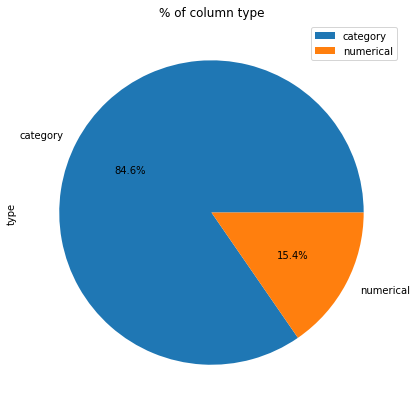

In [8]:
type_df, type_, cat_columns, num_columns = pd.DataFrame(), [0,0], [], []
for col in columns:
    if str(type(data.loc[1,col])) == "<class 'str'>":
        type_[0] += 1
        cat_columns.append(col)
    else:
        type_[1] += 1
        num_columns.append(col)
type_df['type'] = type_
type_df.index = ['category','numerical']
print(f'category column: {cat_columns}',end='\n\n')
print(f'numerical column: {num_columns}',end='\n\n')
plot = type_df.plot.pie(y='type',autopct="%.1f%%",figsize=(8, 7),title='% of column type')

In [9]:
data.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [10]:
test.isna().sum()

city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [11]:
data.fillna({col:'#other' for col in cat_columns},inplace=True)
test.fillna({col:'#other' for col in cat_columns},inplace=True)

In [12]:
# unique values in each column
for col in cat_columns:
    print(f'{col} - {data[col].unique()}',end='\n\n')

city - ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'
 'city_77' 'city_81' 'city_131' 'city_44' 'ci

In [13]:
data.describe().T.style.background_gradient(subset=['mean','std','max'],cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
city_development_index,19158.000000,0.828848,0.123362,0.448000,0.740000,0.903000,0.920000,0.949000
training_hours,19158.000000,65.366896,60.058462,1.000000,23.000000,47.000000,88.000000,336.000000


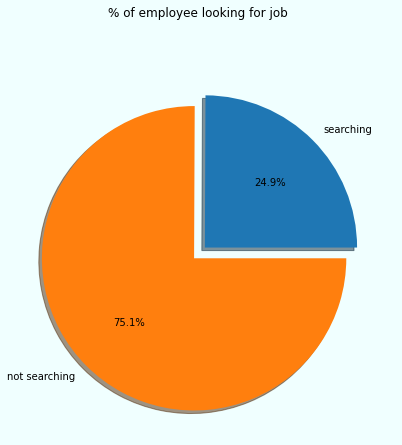

In [14]:
fig, axes = plt.subplots(facecolor='azure',figsize=(8,7))
axes.pie([len(data[data['target']=='searching']), len(data[data['target']=='not searching'])],
         labels=['searching','not searching'], autopct='%1.1f%%',shadow=True,
         explode = (0,0.1))
fig.suptitle('% of employee looking for job')
plt.show()

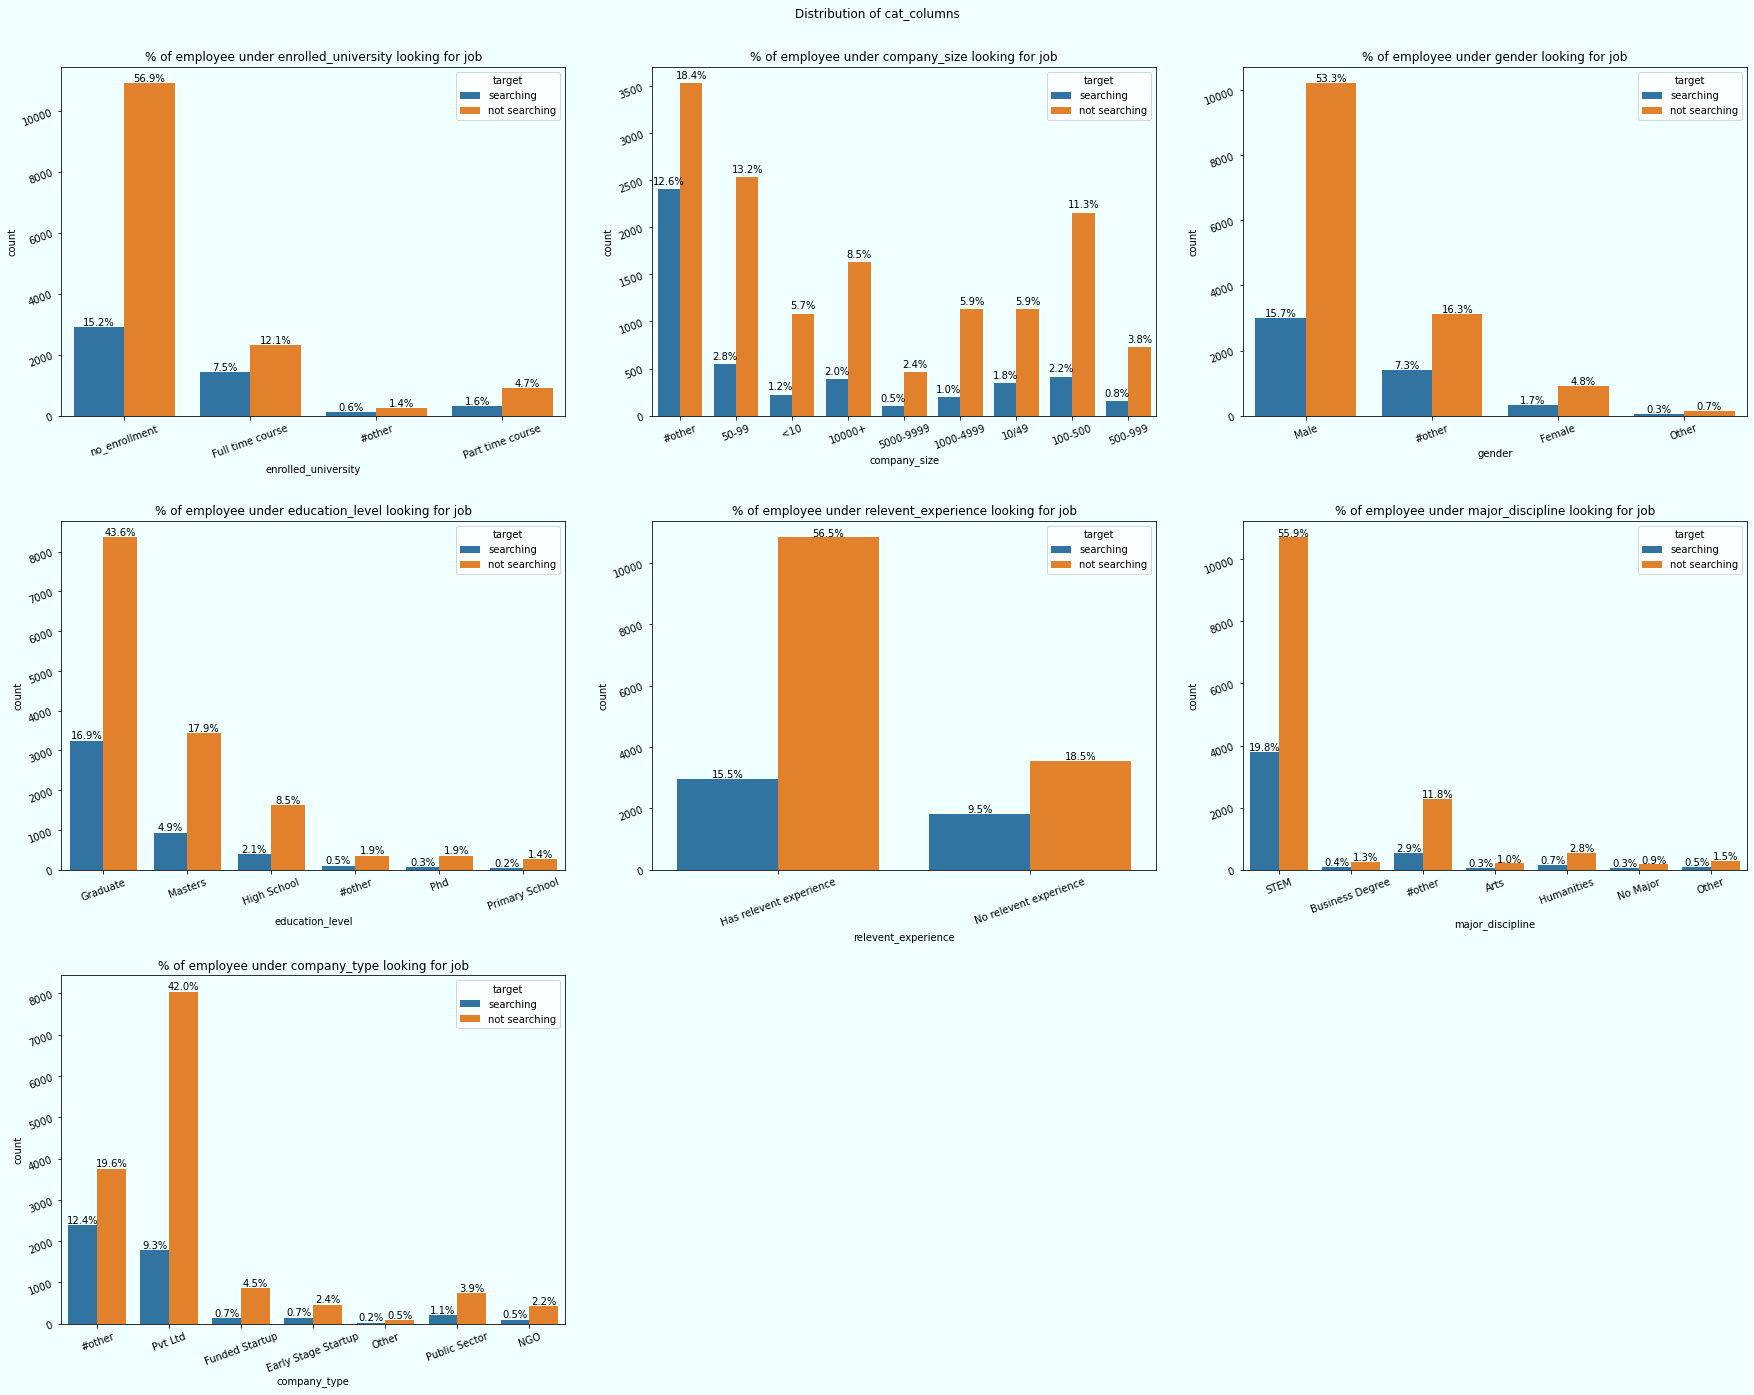

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3, facecolor='azure',figsize=(25,20))
temp, i = list(set(cat_columns) - set(['city','last_new_job','experience','target'])), 0
for axis in axes:
    for axe in axis:
        try:
            tot, ax = len(data), sns.countplot(x=temp[i],hue='target',data=data,saturation=0.75,ax=axe)
            for p in ax.patches:
                percentage = f'{100 * p.get_height()/tot:.1f}%'
    #             print(p, percentage)
                x = p.get_x() + p.get_width()/2
                y = p.get_height() + 50
                ax.annotate(percentage,(x,y),ha='center')
            axe.set_facecolor('azure')
            axe.tick_params(labelrotation=20)
            axe.set_title(f"% of employee under {temp[i]} looking for job")
            i += 1
        except:
            axe.remove()
fig.suptitle("Distribution of cat_columns")
fig.tight_layout(pad = 3)
plt.show()

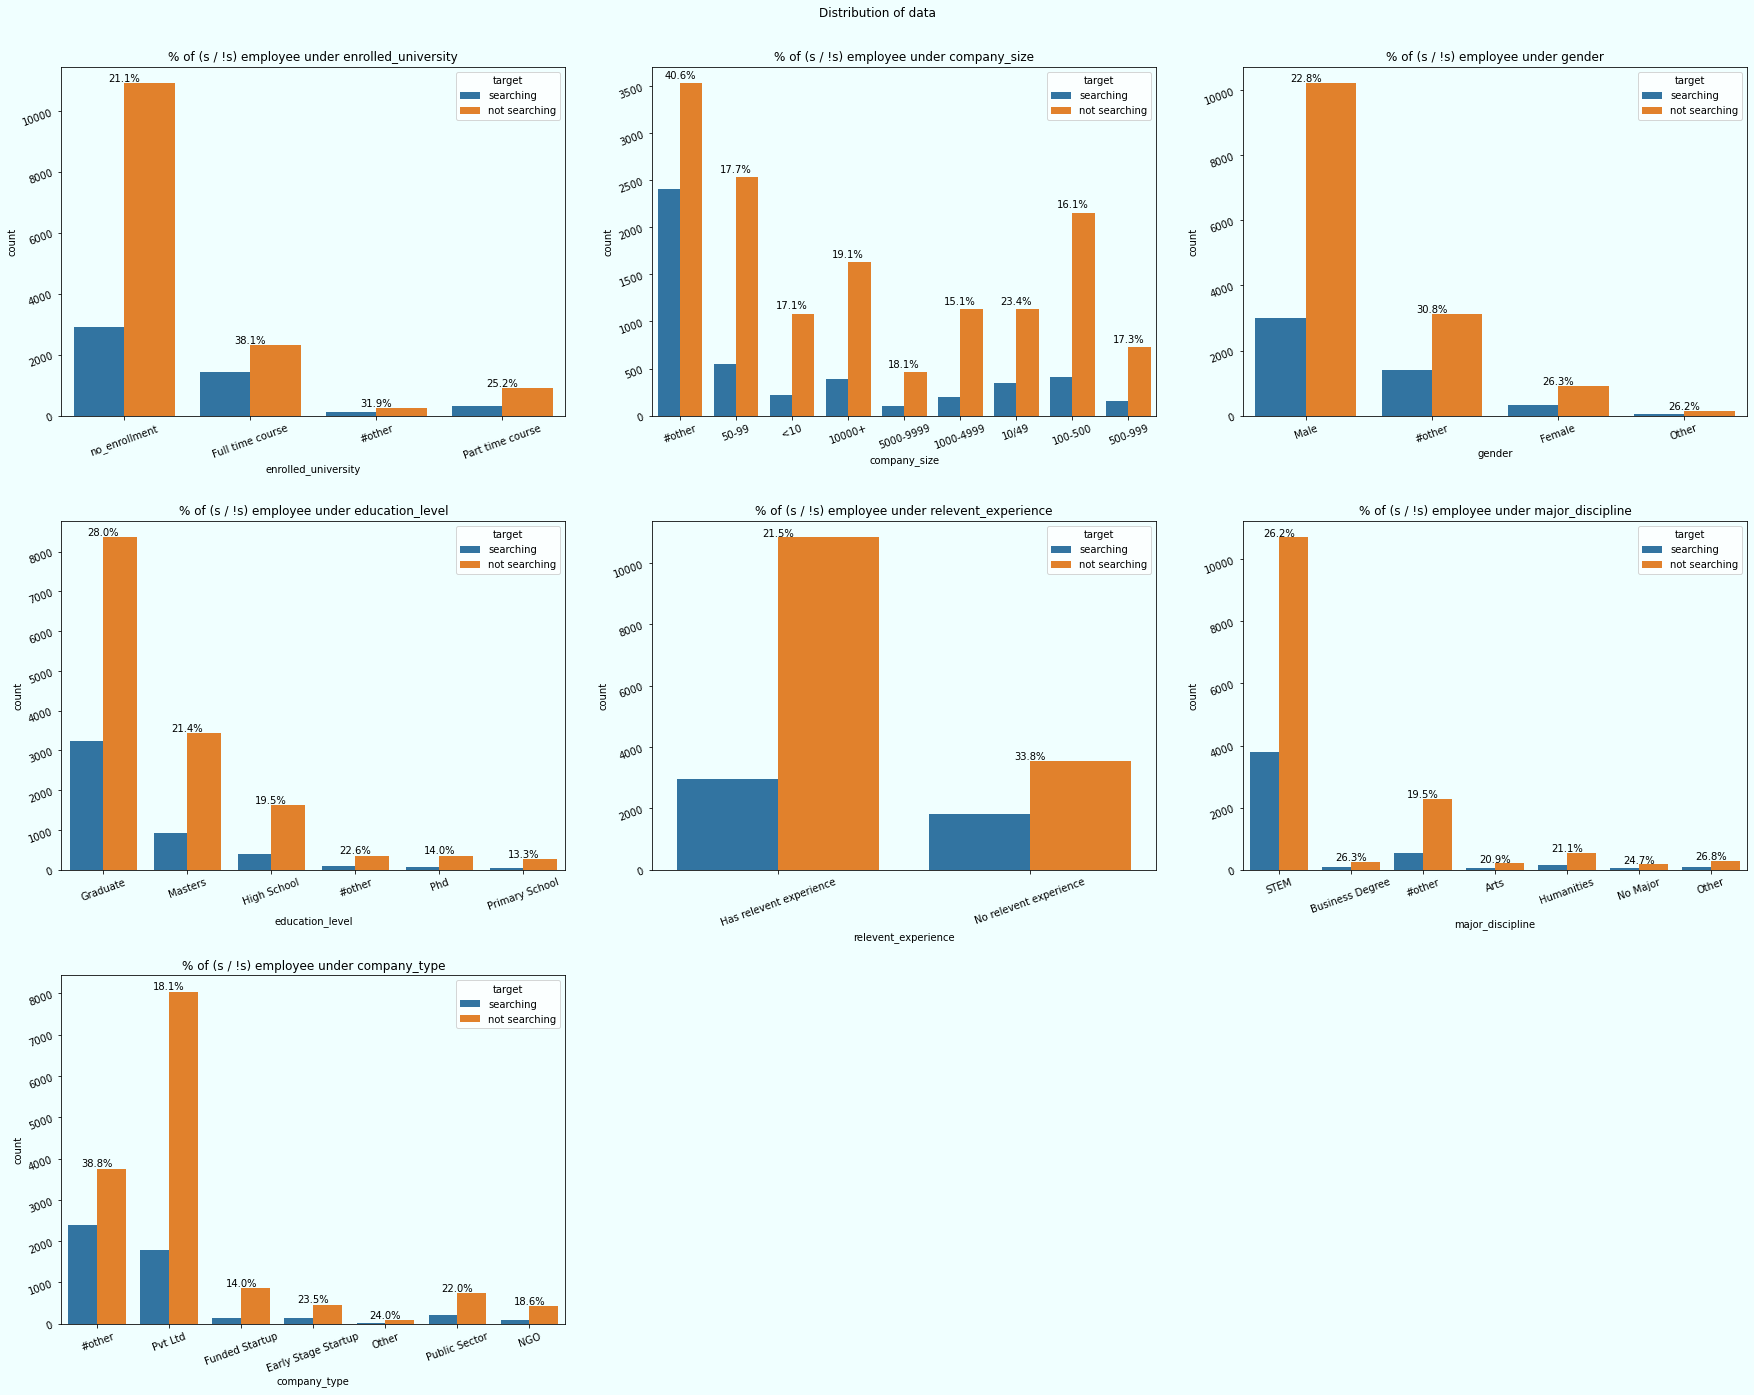

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3, facecolor='azure',figsize=(25,20))
temp, i = list(set(cat_columns) - set(['city','last_new_job','experience','target'])), 0
for axis in axes:
    for axe in axis:
        try:
            tot, ax, per = len(data), sns.countplot(x=temp[i],hue='target',data=data,saturation=0.75,ax=axe), [0] * 2
            patch = ax.patches
            n = len(patch)
            for j in range(n // 2):
                per[0], per[1] = 100 * patch[j].get_height()/tot, 100 * patch[j + n // 2 ].get_height()/tot
                percentage = f'{100 * per[0] / (per[0] + per[1]):.1f}%'
                x = patch[j].get_x() + patch[j].get_width()
                y = patch[j + n // 2].get_height() + 50
                ax.annotate(percentage,(x,y),ha='center')
            axe.set_facecolor('azure')
            axe.tick_params(labelrotation=20)
            axe.set_title(f"% of (s / !s) employee under {temp[i]}")
            i += 1
        except: 
            axe.remove()
fig.suptitle("Distribution of data")
fig.tight_layout(pad = 3)
plt.show()